# Task 1: Data Acquisition & Preparation

- Step 1: Imports the library 

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

- Step 2: Load dataset

In [2]:
DATA_CSV = Path("Data/Fish.csv")

In [3]:
df = pd.read_csv(DATA_CSV)
print("Shape:", df.shape)
df.head()

Shape: (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


- Step 3: Check for missing values

In [4]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

-  Step 4: Split into X (features) and y (target)

In [5]:
y = df["Weight"]
X = df.drop(columns=["Weight"])

- Step 5: Identify numeric & categorical columns

In [6]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)

Numeric: ['Length1', 'Length2', 'Length3', 'Height', 'Width']
Categorical: ['Species']


- Step 6: Preprocessing (encode categorical species)

In [7]:
numeric_preprocess = "passthrough"
categorical_preprocess = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocess, numeric_cols),
        ("cat", categorical_preprocess, categorical_cols)
    ]
)

 - Step 7: Train/test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train_enc = preprocess.fit_transform(X_train)
X_test_enc  = preprocess.transform(X_test)

print("Train shape:", X_train_enc.shape, "Test shape:", X_test_enc.shape)

Train shape: (127, 12) Test shape: (32, 12)


# Task 2: Exploratory Data Analysis (EDA) & Feature Engineering

- Scatter plots (feature vs Weight)

In [10]:
import matplotlib.pyplot as plt

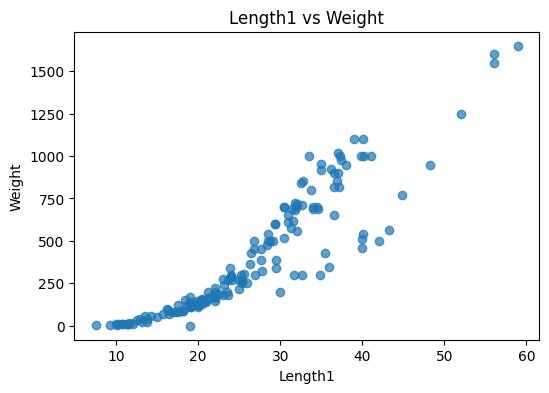

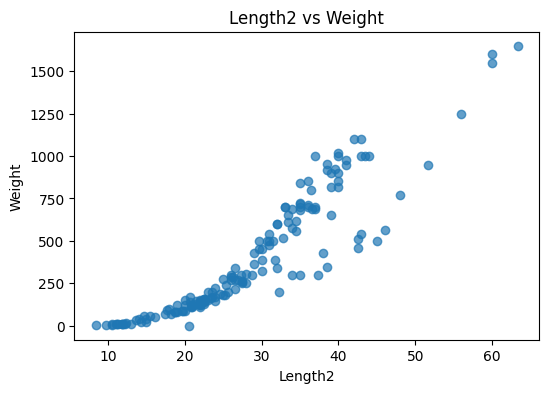

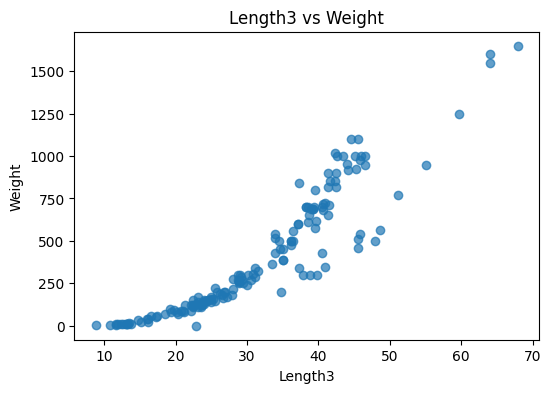

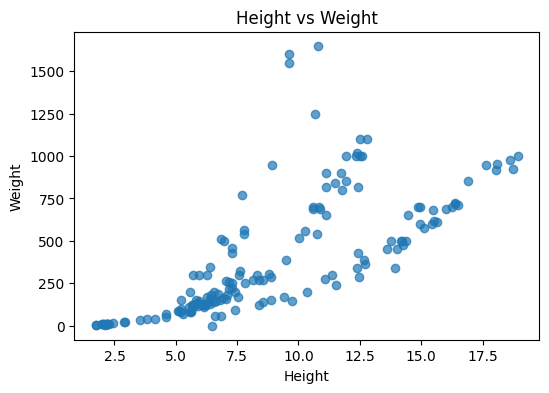

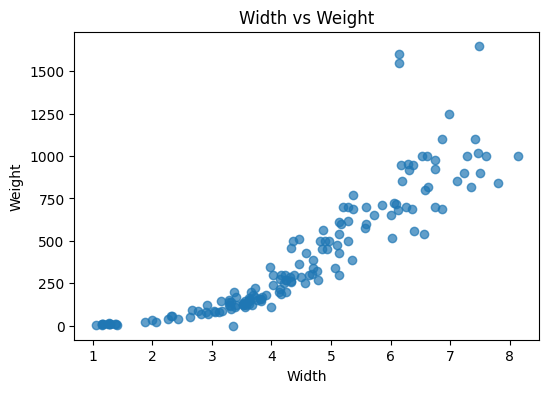

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], y, alpha=0.7)
    plt.title(f"{col} vs Weight")
    plt.xlabel(col)
    plt.ylabel("Weight")
    plt.show()

- Correlation heatmap (numeric only, matplotlib)

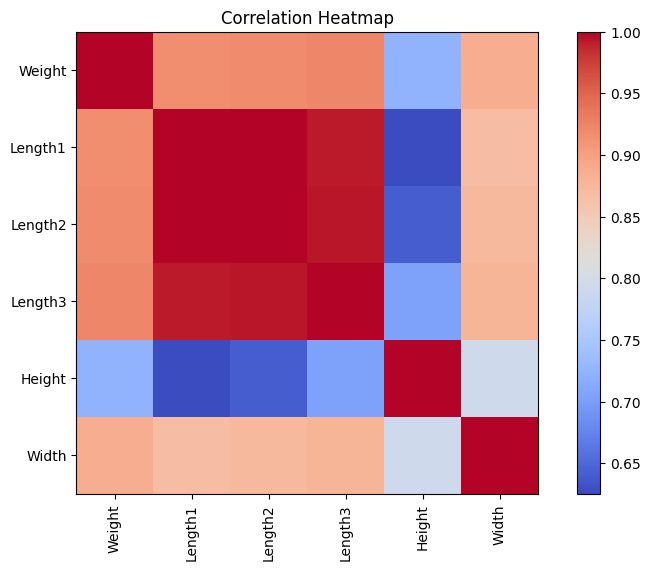

In [15]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

- Boxplots for outlier detection

In [ ]:
for col in numeric_cols + ["Weight"]:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=True, labels=[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Task 3: Model Development & Comparison

Import some library 

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [18]:
results = {}

# Linear Regression
lin_reg = LinearRegression()
results["Linear Regression"] = evaluate_model(lin_reg, X_train_enc, y_train, X_test_enc, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
results["Ridge Regression"] = evaluate_model(ridge, X_train_enc, y_train, X_test_enc, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)
results["Lasso Regression"] = evaluate_model(lasso, X_train_enc, y_train, X_test_enc, y_test)

# Polynomial Regression (degree=2 as example)
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("linreg", LinearRegression())
])
results["Polynomial Regression"] = evaluate_model(poly_model, X_train_enc, y_train, X_test_enc, y_test)

# Display results
print("Model Comparison (RMSE ↓, R² ↑)")
for name, (rmse, r2) in results.items():
    print(f"{name:25s} | RMSE: {rmse:.2f} | R²: {r2:.3f}")

Model Comparison (RMSE ↓, R² ↑)
Linear Regression         | RMSE: 83.71 | R²: 0.951
Ridge Regression          | RMSE: 85.30 | R²: 0.949
Lasso Regression          | RMSE: 83.74 | R²: 0.951
Polynomial Regression     | RMSE: 78.81 | R²: 0.956


C:\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(
